reference: https://www.learndatasci.com/tutorials/geospatial-data-python-geopandas-shapely/

## shapely

In [1]:
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon

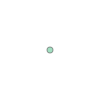

In [2]:
Point(0,0)

In [3]:
a = Point(0, 0)
b = Point(1, 0)
a.distance(b)

1.0

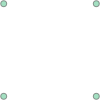

In [4]:
MultiPoint([(0,0), (0,1), (1,1), (1,0)])

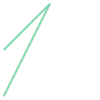

In [5]:
LineString([(0,0),(1,2), (0,1)])

In [6]:
line = LineString([(0,0),(1,2), (0,1)])
print(f'Length of line {line.length}')
print(f'Bounds of line {line.bounds}')

Length of line 3.6502815398728847
Bounds of line (0.0, 0.0, 1.0, 2.0)


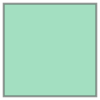

In [7]:
Polygon([(0,0), (0,1), (1,1), (1,0)])

In [8]:
pol = Polygon([(0,0), (0,1), (1,1), (1,0)])
pol.area

1.0

In [9]:
pol.intersects(line)

True

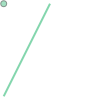

In [10]:
pol.intersection(line)

## geopandas

In [1]:
import matplotlib
import geopandas as gpd

In [2]:
world_gdf = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
world_gdf

C:\Users\EZ\AppData\Local\Temp\ipykernel_20124\653014382.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path('naturalearth_lowres')
Cannot find header.dxf (GDAL_DATA is not defined)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [3]:
world_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
world_gdf = world_gdf.to_crs("+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs")
world_gdf.crs

<Projected CRS: +proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +un ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
world_gdf['pop_density'] = world_gdf.pop_est / world_gdf.area * 10**6

world_gdf.sort_values(by='pop_density', ascending=False)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,pop_density
99,163046161.0,Asia,Bangladesh,BGD,302571,"POLYGON ((8455037.031 2862141.705, 8469605.972...",1213.825913
79,4685306.0,Asia,Palestine,PSE,16276,"POLYGON ((3127401.561 4023733.541, 3087561.638...",927.566405
140,23568378.0,Asia,Taiwan,TWN,1127000,"POLYGON ((11034560.069 3156825.603, 11032285.2...",683.638053
77,6855713.0,Asia,Lebanon,LBN,51991,"POLYGON ((3141154.397 4236334.349, 3117804.289...",677.388357
169,12626950.0,Africa,Rwanda,RWA,10354,"POLYGON ((2859375.715 -149565.705, 2896415.181...",536.821849
...,...,...,...,...,...,...,...
97,3225167.0,Asia,Mongolia,MNG,13996,"POLYGON ((7032142.671 6000941.853, 7107939.605...",2.089135
20,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-4814015.486 -6253920.632, -4740858....",0.207918
22,56225.0,North America,Greenland,GRL,3051,"POLYGON ((-2555525.099 8347965.820, -2346518.8...",0.025617
23,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16,"POLYGON ((5550199.759 -5932855.132, 5589906.67...",0.012091


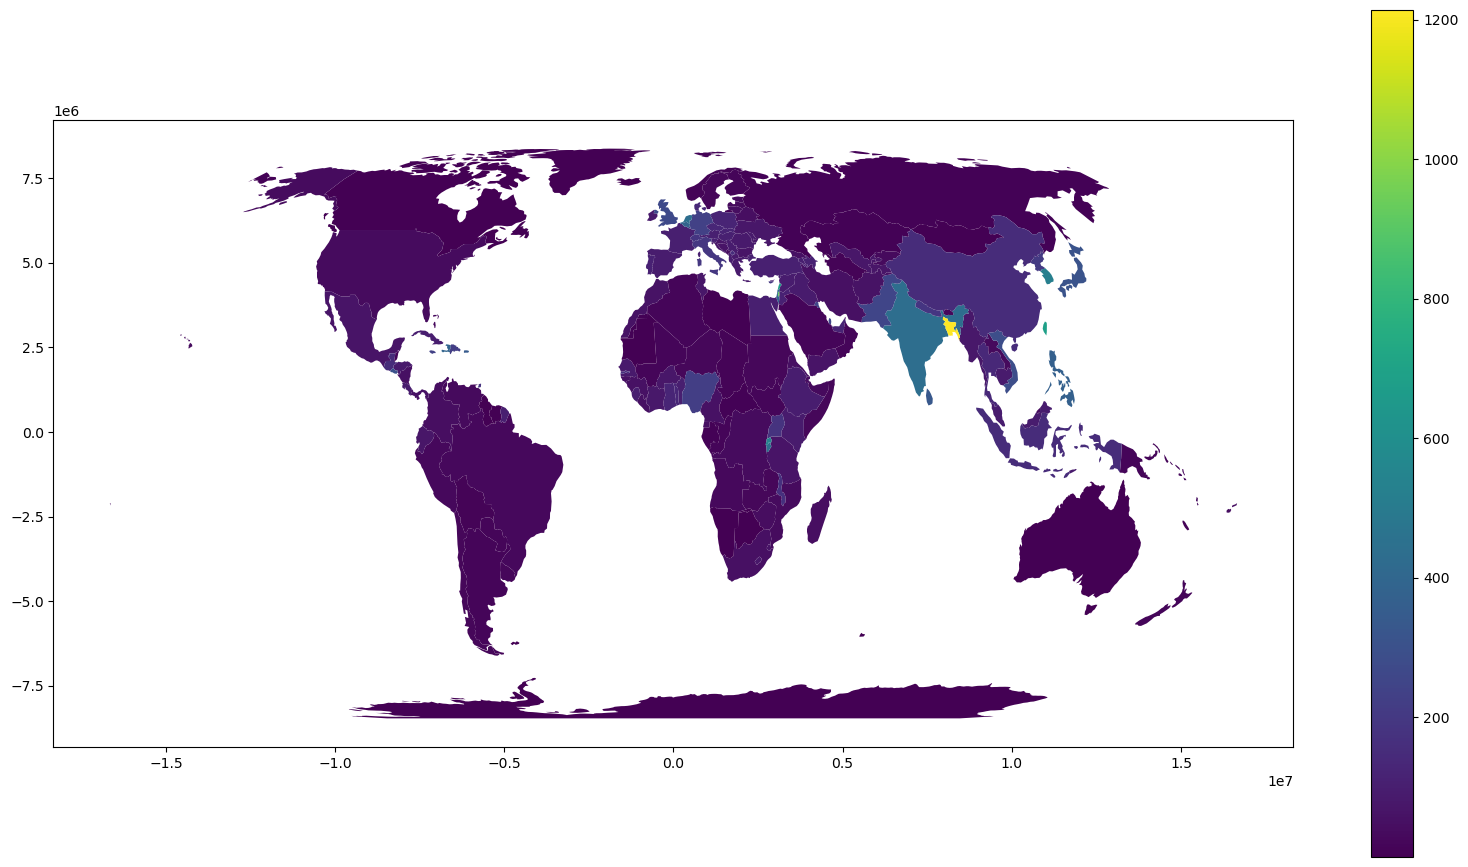

In [6]:
figsize = (20, 11)

world_gdf.plot('pop_density', legend=True, figsize=figsize);

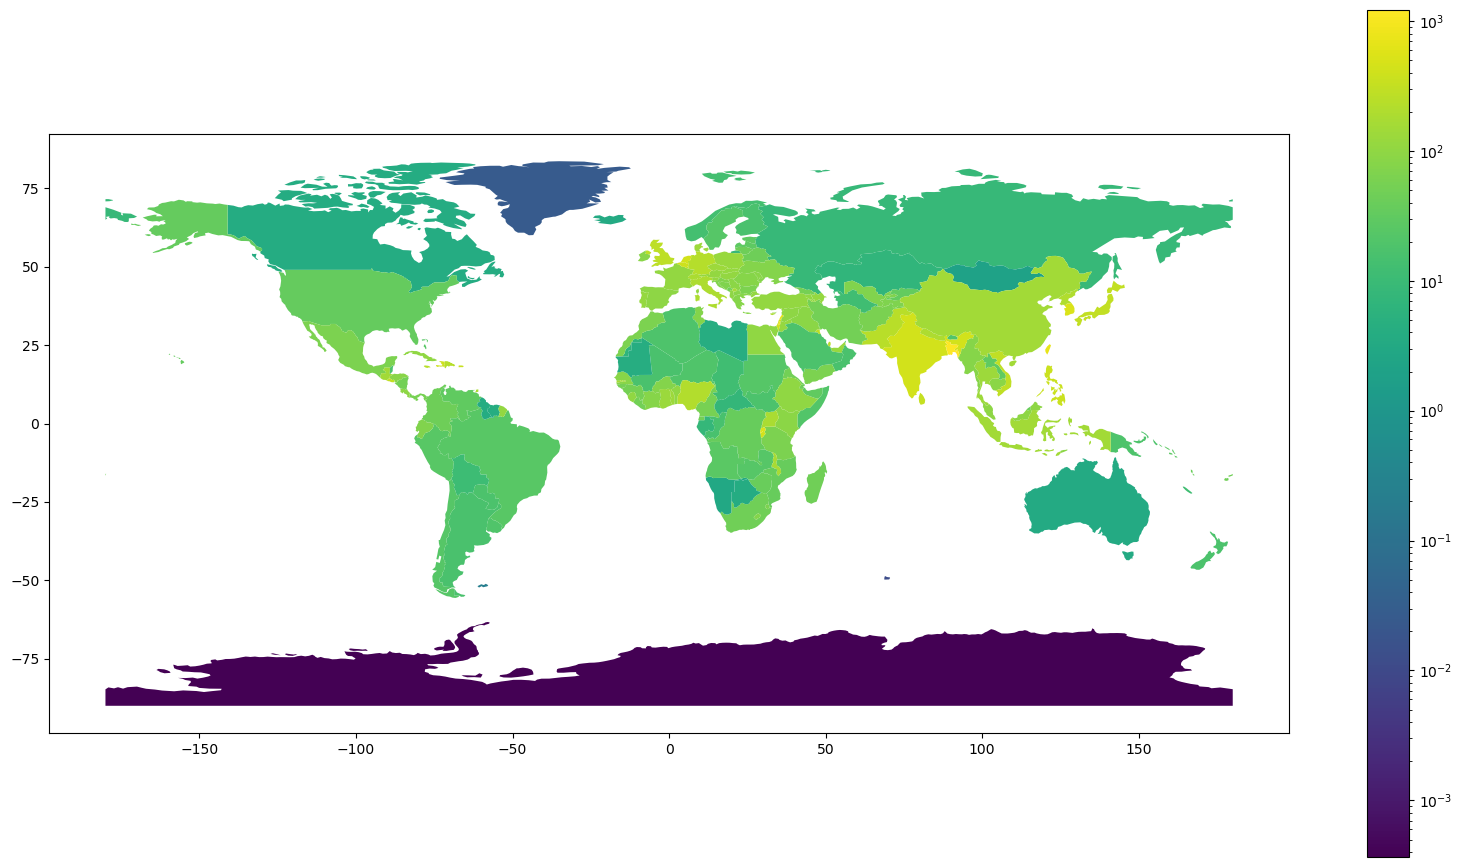

In [7]:
norm = matplotlib.colors.LogNorm(vmin=world_gdf.pop_density.min(), vmax=world_gdf.pop_density.max())

world_gdf.to_crs('epsg:4326').plot("pop_density", 
                                   figsize=figsize, 
                                   legend=True,  
                                   norm=norm);